In [39]:
%pylab inline
import skimage.io
from scipy.ndimage.morphology import binary_erosion, binary_dilation, binary_closing, binary_opening
from skimage.morphology import opening, closing, dilation, erosion

Populating the interactive namespace from numpy and matplotlib


# Лаб №4

Дата сдачи: 17-10-2016 00:00 MSK UTC+3

### 4. Вычисление и визуализация морфологического спектра

Разработать программу вычисления и визуализации морфологического спектра для бинарных и полутоновых изображений для различных структурирующих элементов (структурирующий элемент задается в виде аргумента).

Содержание отчета:

- Исходные изображения
- Код программы
- Результат работы программы

In [2]:
def fancy_show(imgs, *, n_cols=None, fig_dim=None):
    if type(imgs) == numpy.ndarray:
        imgs = [imgs]
    if len(imgs) == 1:
        n_rows = 1
        n_cols = 1
        if fig_dim == None:
            fig_dim = 5
        figsize = (fig_dim, fig_dim)
    else:
        if n_cols == None:
            n_cols = min(len(imgs), 3)
        n_rows = int(ceil(len(imgs) / n_cols))
        if fig_dim == None:
            fig_dim = 15
    figsize = (fig_dim, fig_dim / n_cols * n_rows)
    fig = plt.figure(figsize=figsize)
    for i, img in enumerate(imgs):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        ax.imshow(img, cmap='gray', interpolation='none')

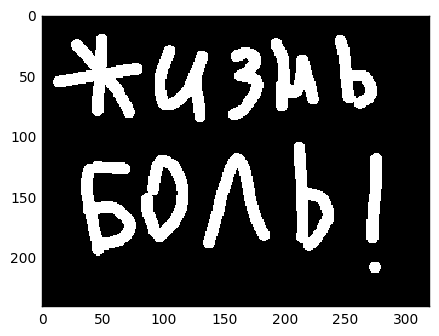

In [3]:
img = (imread('not-convex.png') > 0.5)[::2, ::2]
if len(img.shape) == 3:
    img = img[:, :, 0]
fancy_show(img)

In [4]:
struct_el = np.ones((3, 3))

In [15]:
def bin_spectrum(image, B, max_iter = 30):
    xs = []
    ys = []
    radius = max(B.shape) // 2

    B_curr = array([[True]])
    for i in range(1, max_iter):
        img_curr = binary_closing(image, B_curr)
        B_curr = binary_dilation(pad(B_curr, radius, "constant"), B)
        img_next = binary_closing(image, B_curr)
        img_cross = invert(img_curr) * img_next
        count = np.count_nonzero(img_cross)
        if count == 0:
            break
        xs.append(-i)
        ys.append(count)

    n = 0
    B_curr = np.array([[True]])
    for i in range(max_iter):
        if not(any(binary_erosion(image, B_curr))):
            break
        img_curr = binary_opening(image, B_curr)
        B_curr = binary_dilation(pad(B_curr, radius, "constant"), B) 
        img_next = binary_opening(image, B_curr)
        img_cross = invert(img_next) * img_curr
        count = np.count_nonzero(img_cross)
        
        xs.append(i)
        ys.append(count)

    return xs, ys


<Container object of 34 artists>

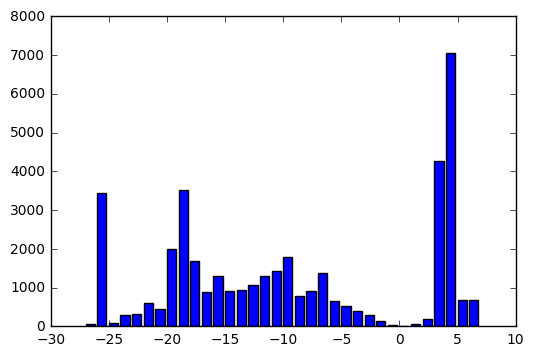

In [67]:
xs, ys = bin_spectrum(img, struct_el)
plt.bar(xs, ys)

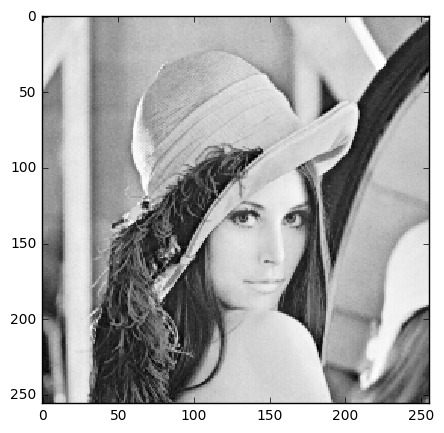

In [42]:
img_gray = imread('lenna.png')[::2, ::2, 0]
fancy_show(img_gray)

In [65]:
def gray_spectrum(image, B, max_iter = 10):
    xs = []
    ys = []
    radius = max(B.shape) // 2
    
    B_curr = array([[True]])
    for i in range(1, max_iter):
        if not(any(np.count_nonzero(erosion(image, B_curr)))):
            break
        img_curr = closing(image, B_curr)
        B_curr = binary_dilation(pad(B_curr, radius , "constant"), B) 
        img_next = closing(image, B_curr)
        img_cross = img_next - img_curr
        count = sum(img_cross)
        if count == 0:
            break
        
        xs.append(-i)
        ys.append(count)
    
    n = 0
    B_curr = array([[True]])
    for i in range(max_iter):
        img_curr = opening(image, B_curr)
        B_curr = binary_dilation(pad(B_curr, radius, "constant"), B) 
        img_next = opening(image, B_curr)
        
        img_cross = img_curr - img_next
        count = sum(img_cross)
        if(count == 0):
            break
        
        xs.append(i)
        ys.append(count)
    
    return xs, ys

<Container object of 39 artists>

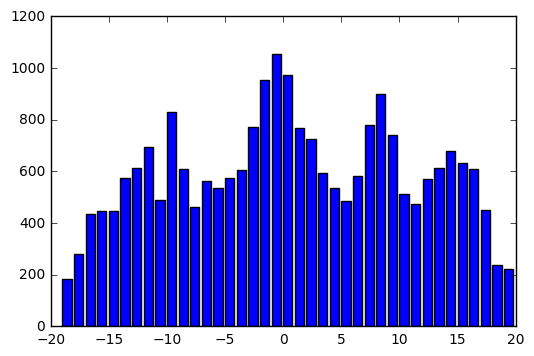

In [68]:
xs, ys = gray_spectrum(img_gray, struct_el, 20)
bar(xs, ys)